## Advanced Regression - Australian house pricing

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from scipy.stats import norm
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

#### Data understanding and exploration

In [2]:
house_df = pd.read_csv('train.csv')
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_df.shape

(1460, 81)

In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1379.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,46.549,567.240,1057.429,1162.627,346.992,5.845,1515.464,0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1978.506,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,24.690,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,1129.500,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1961.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,477.500,991.500,1087.000,0.000,0.000,1464.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1980.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,0.000,808.000,1298.250,1391.250,728.000,0.000,1776.750,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,2336.000,6110.000,4692.000,2065.000,572.000,5642.000,3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,2010.000,4.000,1418.000,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


In [6]:
# Checking the percentage of missing values
round(100*(house_df.isnull().sum()/len(house_df.index)), 2)

Id               0.000
MSSubClass       0.000
MSZoning         0.000
LotFrontage     17.740
LotArea          0.000
Street           0.000
Alley           93.770
LotShape         0.000
LandContour      0.000
Utilities        0.000
LotConfig        0.000
LandSlope        0.000
Neighborhood     0.000
Condition1       0.000
Condition2       0.000
BldgType         0.000
HouseStyle       0.000
OverallQual      0.000
OverallCond      0.000
YearBuilt        0.000
YearRemodAdd     0.000
RoofStyle        0.000
RoofMatl         0.000
Exterior1st      0.000
Exterior2nd      0.000
MasVnrType       0.550
MasVnrArea       0.550
ExterQual        0.000
ExterCond        0.000
Foundation       0.000
BsmtQual         2.530
BsmtCond         2.530
BsmtExposure     2.600
BsmtFinType1     2.530
BsmtFinSF1       0.000
BsmtFinType2     2.600
BsmtFinSF2       0.000
BsmtUnfSF        0.000
TotalBsmtSF      0.000
Heating          0.000
HeatingQC        0.000
CentralAir       0.000
Electrical       0.070
1stFlrSF   

#### Handling the meaninigful missing values and imputing the others with median

In [7]:
# Treating meaningful missing values
house_df['Alley'].fillna("No Alley", inplace=True)

house_df['FireplaceQu'] = house_df['FireplaceQu'].fillna('No Fireplace')

house_df['PoolQC'] = house_df['PoolQC'].fillna('No Pool')

house_df['Fence'] = house_df['Fence'].fillna('No Fence')

house_df['MiscFeature'] = house_df['MiscFeature'].fillna('None')

house_df['MasVnrType'] = house_df['MasVnrType'].fillna('None')

house_df['Electrical'] = house_df['Electrical'].fillna("Other")

# Garage columns
for column in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    house_df[column] = house_df[column].fillna('No Garage')

# Basement columns
for column in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    house_df[column] = house_df[column].fillna('No Basement')
    

In [8]:
# Imputing the remaining missing
house_df['GarageYrBlt'] = house_df['GarageYrBlt'].fillna(0)

house_df["LotFrontage"] = house_df["LotFrontage"].replace(np.nan, house_df['LotFrontage'].median())

house_df["MasVnrArea"] = house_df["MasVnrArea"].replace(np.nan, house_df['MasVnrArea'].median())


In [9]:
# Checking the percentage of missing values
round(100*(house_df.isnull().sum()/len(house_df.index)), 2)

Id              0.000
MSSubClass      0.000
MSZoning        0.000
LotFrontage     0.000
LotArea         0.000
Street          0.000
Alley           0.000
LotShape        0.000
LandContour     0.000
Utilities       0.000
LotConfig       0.000
LandSlope       0.000
Neighborhood    0.000
Condition1      0.000
Condition2      0.000
BldgType        0.000
HouseStyle      0.000
OverallQual     0.000
OverallCond     0.000
YearBuilt       0.000
YearRemodAdd    0.000
RoofStyle       0.000
RoofMatl        0.000
Exterior1st     0.000
Exterior2nd     0.000
MasVnrType      0.000
MasVnrArea      0.000
ExterQual       0.000
ExterCond       0.000
Foundation      0.000
BsmtQual        0.000
BsmtCond        0.000
BsmtExposure    0.000
BsmtFinType1    0.000
BsmtFinSF1      0.000
BsmtFinType2    0.000
BsmtFinSF2      0.000
BsmtUnfSF       0.000
TotalBsmtSF     0.000
Heating         0.000
HeatingQC       0.000
CentralAir      0.000
Electrical      0.000
1stFlrSF        0.000
2ndFlrSF        0.000
LowQualFin

In [10]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


In [11]:
# Checking the skewness of columns
house_categorical = house_df.select_dtypes(include=['object'])

In [12]:
house_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
1,RL,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
2,RL,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal
3,RL,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Abnorml
4,RL,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,None,WD,Normal


In [13]:
# Getting the percentages of each value in categorical columns
for column in house_categorical:
    print(house_categorical[column].value_counts(normalize=True)*100)
    print("-----------------------------------------------")

RL        78.836
RM        14.932
FV         4.452
RH         1.096
C (all)    0.685
Name: MSZoning, dtype: float64
-----------------------------------------------
Pave   99.589
Grvl    0.411
Name: Street, dtype: float64
-----------------------------------------------
No Alley   93.767
Grvl        3.425
Pave        2.808
Name: Alley, dtype: float64
-----------------------------------------------
Reg   63.356
IR1   33.151
IR2    2.808
IR3    0.685
Name: LotShape, dtype: float64
-----------------------------------------------
Lvl   89.795
Bnk    4.315
HLS    3.425
Low    2.466
Name: LandContour, dtype: float64
-----------------------------------------------
AllPub   99.932
NoSeWa    0.068
Name: Utilities, dtype: float64
-----------------------------------------------
Inside    72.055
Corner    18.014
CulDSac    6.438
FR2        3.219
FR3        0.274
Name: LotConfig, dtype: float64
-----------------------------------------------
Gtl   94.658
Mod    4.452
Sev    0.890
Name: LandSlope, dty

In [14]:
house_categorical.shape

(1460, 43)

#### Dropping the columns with skewness greater than 80%

In [15]:
# Dropping the columns with skewness greater than 80%
for column in house_categorical:
    max_skew = (house_categorical[column].value_counts(normalize=True).max()*100)
    if max_skew > 80:
        house_categorical.drop(column, axis=1, inplace=True)

house_categorical.head()

,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,RL,Reg,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,No Fireplace,Attchd,RFn
1,RL,Reg,FR2,Veenker,1Story,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn
2,RL,IR1,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn
3,RL,IR1,Corner,Crawfor,2Story,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf
4,RL,IR1,FR2,NoRidge,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn


In [16]:
house_categorical.shape

(1460, 19)

After dropping all the columns that have a single value greater than 80%, the number of categorical columns dropped from 43 to 19

In [17]:
# Getting the numeric variables
house_numeric = house_df.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.000,8450,7,5,2003,2003,196.000,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.000,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.000,9600,6,8,1976,1976,0.000,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.000,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.000,11250,7,5,2001,2002,162.000,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.000,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.000,9550,7,5,1915,1970,0.000,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.000,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.000,14260,8,5,2000,2000,350.000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.000,3,836,192,84,0,0,0,0,0,12,2008,250000


In [18]:
# dropping ID 
house_numeric = house_numeric.drop(['Id'], axis=1)
house_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.000,8450,7,5,2003,2003,196.000,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.000,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.000,9600,6,8,1976,1976,0.000,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.000,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.000,11250,7,5,2001,2002,162.000,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.000,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.000,9550,7,5,1915,1970,0.000,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.000,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.000,14260,8,5,2000,2000,350.000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.000,3,836,192,84,0,0,0,0,0,12,2008,250000


In [19]:
# Percentiles of numeric columns
house_numeric.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,56.897,69.864,10516.828,6.099,5.575,1971.268,1984.866,103.117,443.640,46.549,567.240,1057.429,1162.627,346.992,5.845,1515.464,0.425,0.058,1.565,0.383,2.866,1.047,6.518,0.613,1868.740,1.767,472.980,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,42.301,22.028,9981.265,1.383,1.113,30.203,20.645,180.731,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,1.625,0.645,453.697,0.747,213.805,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,20.000,60.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,1129.500,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1958.000,1.000,334.500,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,477.500,991.500,1087.000,0.000,0.000,1464.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1977.000,2.000,480.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,70.000,79.000,11601.500,7.000,6.000,2000.000,2004.000,164.250,712.250,0.000,808.000,1298.250,1391.250,728.000,0.000,1776.750,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2001.000,2.000,576.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
90%,120.000,92.000,14381.700,8.000,7.000,2006.000,2006.000,335.000,1065.500,117.200,1232.000,1602.200,1680.000,954.200,0.000,2158.300,1.000,0.000,2.000,1.000,4.000,1.000,9.000,1.000,2006.000,3.000,757.100,262.000,130.000,112.000,0.000,0.000,0.000,0.000,10.000,2010.000,278000.000
95%,160.000,104.000,17401.150,8.000,8.000,2007.000,2007.000,456.000,1274.000,396.200,1468.000,1753.000,1831.250,1141.050,0.000,2466.100,1.000,1.000,2.000,1.000,4.000,1.000,10.000,2.000,2007.000,3.000,850.100,335.000,175.050,180.150,0.000,160.000,0.000,0.000,11.000,2010.000,326100.000
99%,190.000,137.410,37567.640,10.000,9.000,2009.000,2009.000,791.280,1572.410,830.380,1797.050,2155.050,2219.460,1418.920,360.000,3123.480,2.000,1.000,3.000,1.000,5.000,2.000,11.000,2.000,2009.000,3.000,1002.790,505.460,285.820,261.050,168.000,268.050,0.000,700.000,12.000,2010.000,442567.010


#### Data Visualization and Cleaning

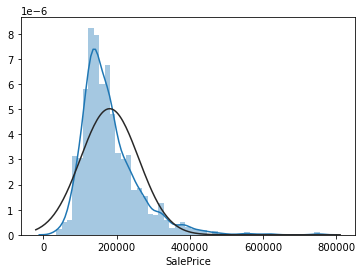

In [20]:
# Checking the price column
sns.distplot(house_numeric['SalePrice'], fit=norm)
plt.show()

The target variable is slightly skewed

#### Visualizing the numeric columns with price

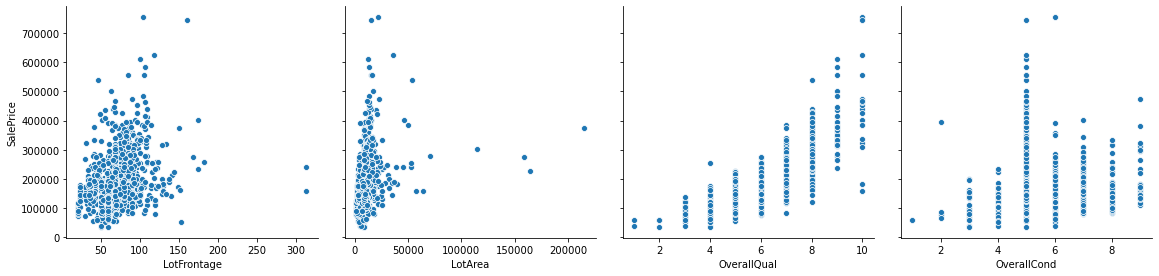

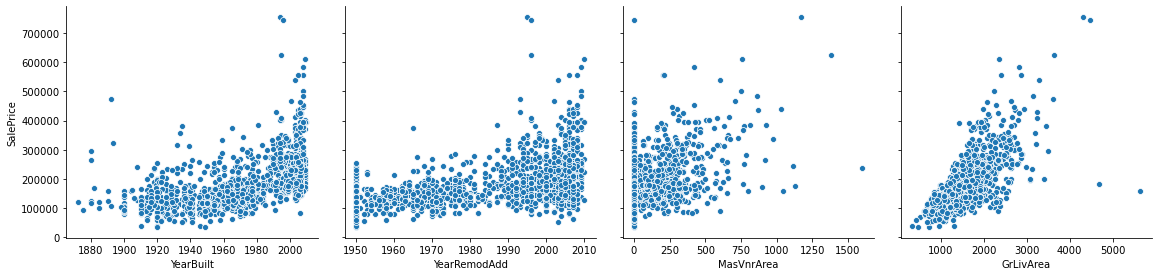

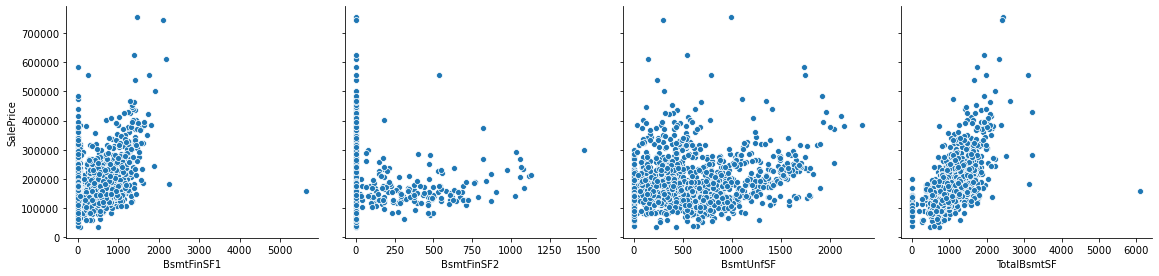

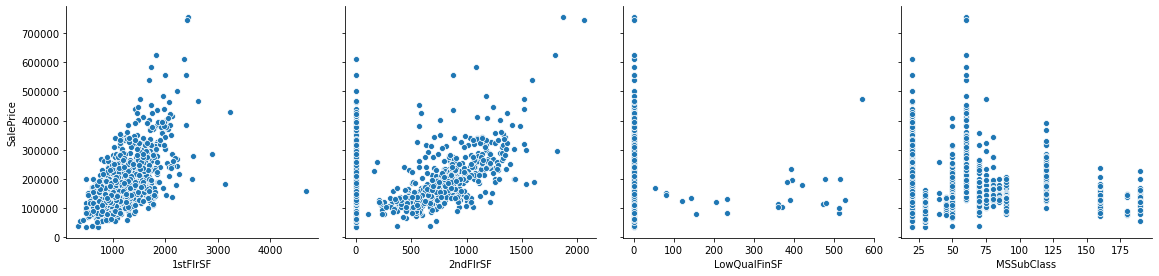

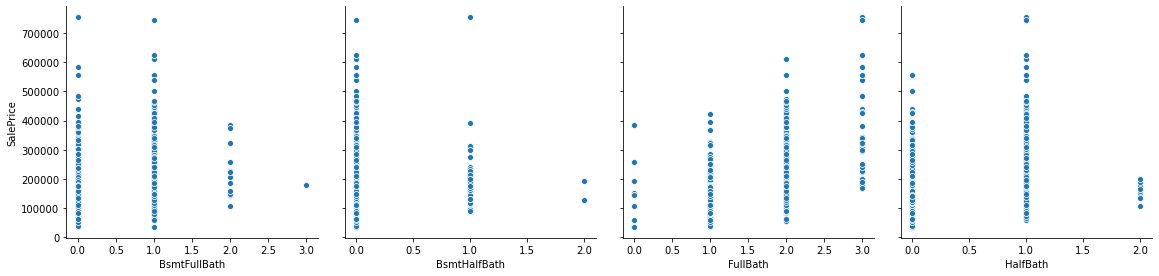

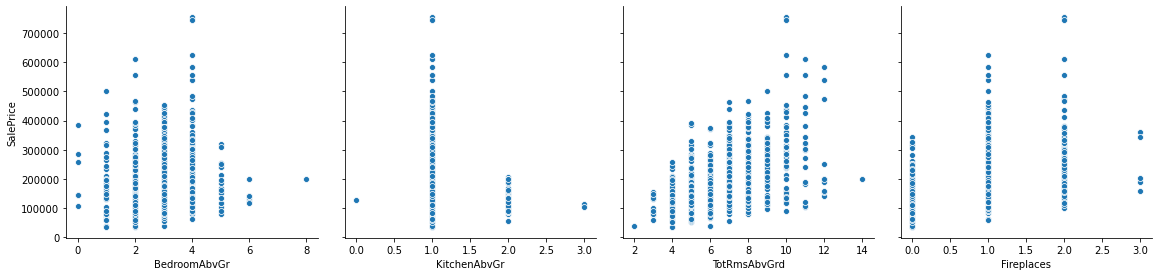

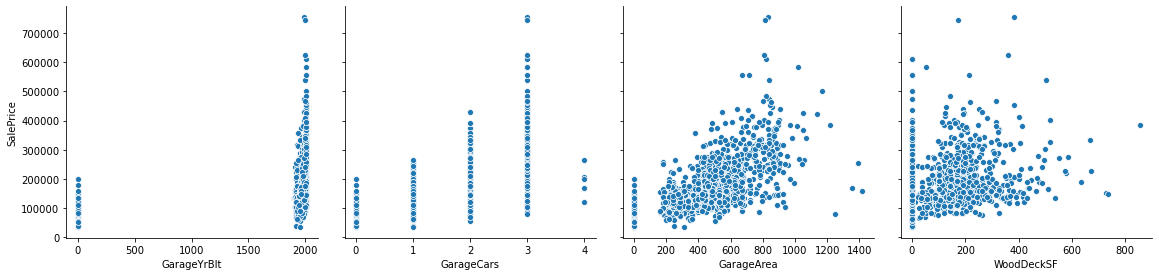

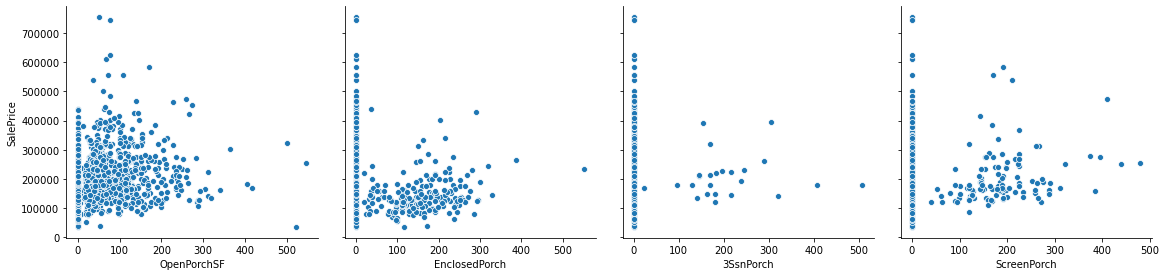

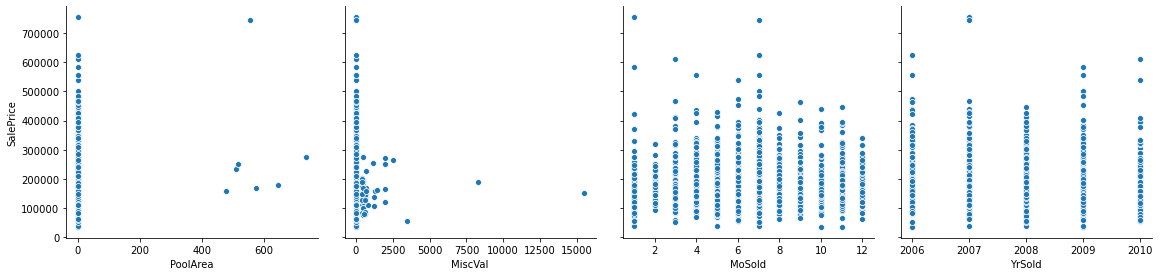

In [21]:
# Pairplots x axis - columns, y axis - price
sns.pairplot(house_numeric, x_vars=['LotFrontage', 'LotArea', 'OverallQual','OverallCond'], y_vars='SalePrice',height=4, aspect=1, kind='scatter')

sns.pairplot(house_numeric, x_vars=['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1, kind='scatter')

sns.pairplot(house_numeric, x_vars=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1, kind='scatter')

sns.pairplot(house_numeric, x_vars=['1stFlrSF', '2ndFlrSF','LowQualFinSF','MSSubClass'], y_vars='SalePrice',height=4, aspect=1, kind='scatter')

sns.pairplot(house_numeric, x_vars=['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1, kind='scatter')

sns.pairplot(house_numeric, x_vars=['BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces'], y_vars='SalePrice',height=4, aspect=1, kind='scatter')

sns.pairplot(house_numeric, x_vars=['GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1, kind='scatter')

sns.pairplot(house_numeric, x_vars=['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'], y_vars='SalePrice',height=4, aspect=1, kind='scatter')

sns.pairplot(house_numeric, x_vars=['PoolArea','MiscVal', 'MoSold', 'YrSold'], y_vars='SalePrice',height=4, aspect=1, kind='scatter')

plt.show()

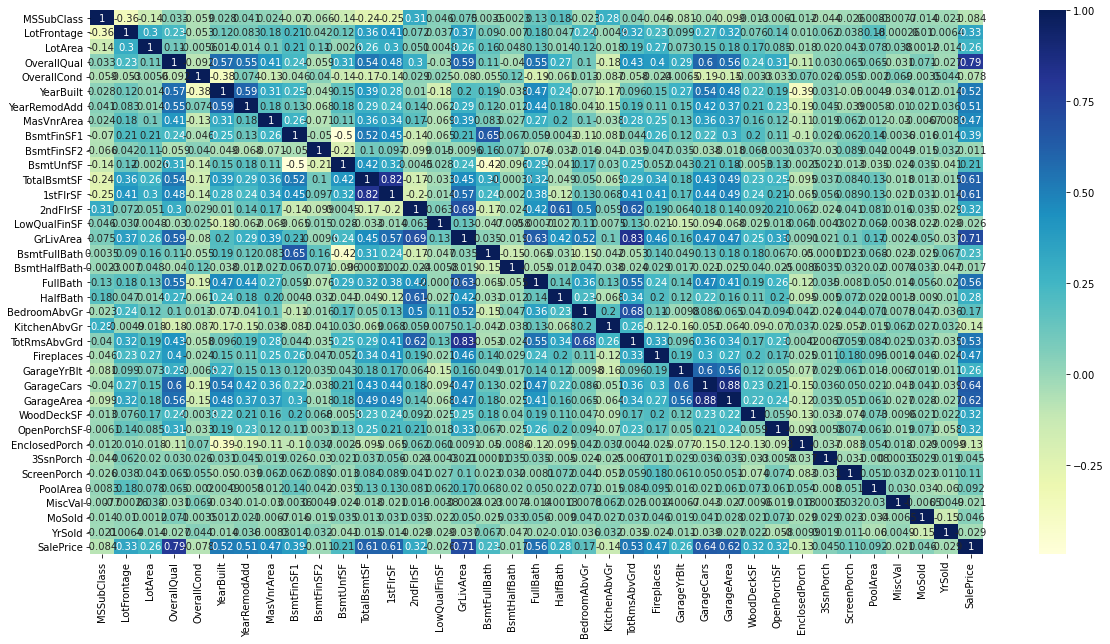

In [22]:
# Correlation map
plt.figure(figsize = (20, 10))
sns.heatmap(house_numeric.corr(), annot = True, cmap="YlGnBu")
plt.show()

Apart from few columns, most of them are not correlated to each other

In [23]:
# Dropping few columns that are highly correlated greater than 0.8
house_numeric.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

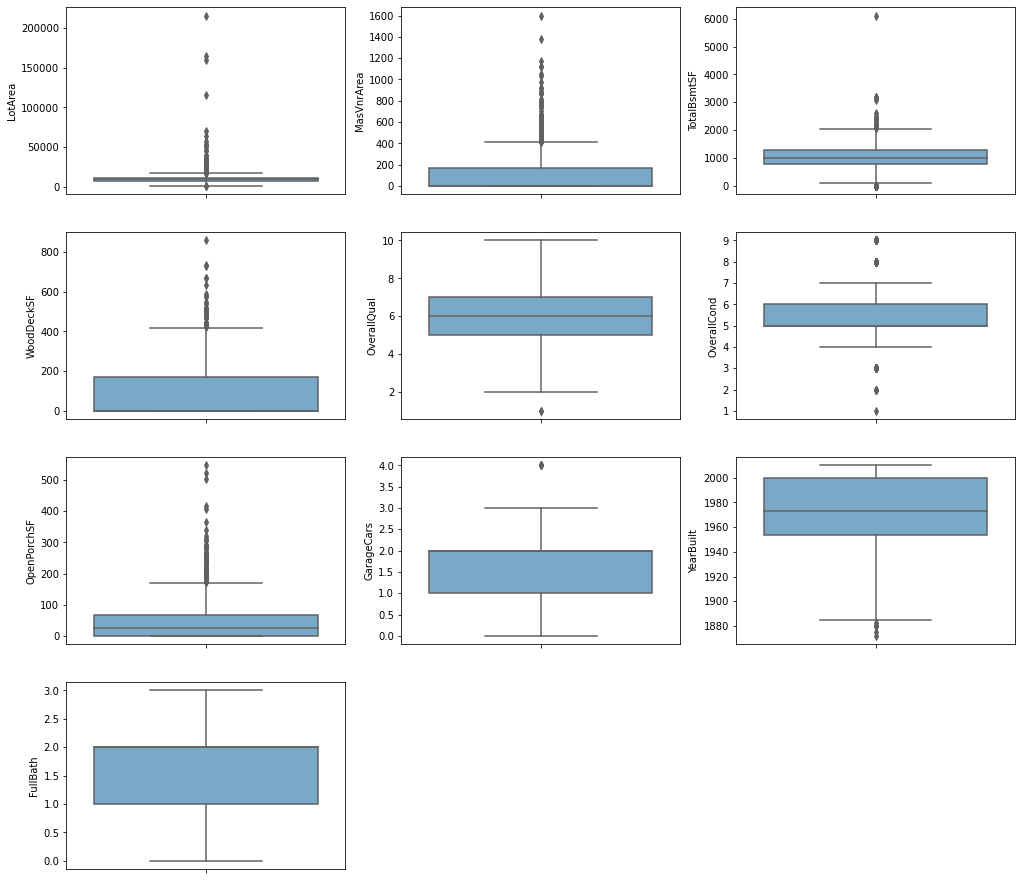

In [24]:
# Checking for outliers in some columns and treating them
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Blues', data = house_numeric)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Blues', data = house_numeric)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Blues', data = house_numeric)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Blues', data = house_numeric)
plt.subplot(5,3,5)
sns.boxplot(y = 'OverallQual', palette='Blues', data = house_numeric)
plt.subplot(5,3,6)
sns.boxplot(y = 'OverallCond', palette='Blues', data = house_numeric)
plt.subplot(5,3,7)
sns.boxplot(y = 'OpenPorchSF', palette='Blues', data = house_numeric)
plt.subplot(5,3,8)
sns.boxplot(y = 'GarageCars', palette='Blues', data = house_numeric)
plt.subplot(5,3,9)
sns.boxplot(y = 'YearBuilt', palette='Blues', data = house_numeric)
plt.subplot(5,3,10)
sns.boxplot(y = 'FullBath', palette='Blues', data = house_numeric)
plt.show()

There are many outliers in these columns which should be capped

In [25]:
house_numeric.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,56.897,69.864,10516.828,6.099,5.575,1971.268,1984.866,103.117,443.640,46.549,567.240,1057.429,1162.627,346.992,5.845,1515.464,0.425,0.058,1.565,0.383,2.866,1.047,0.613,1868.740,1.767,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,42.301,22.028,9981.265,1.383,1.113,30.203,20.645,180.731,456.098,161.319,441.867,438.705,386.588,436.528,48.623,525.480,0.519,0.239,0.551,0.503,0.816,0.220,0.645,453.697,0.747,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,20.000,60.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,0.000,223.000,795.750,882.000,0.000,0.000,1129.500,0.000,0.000,1.000,0.000,2.000,1.000,0.000,1958.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,0.000,477.500,991.500,1087.000,0.000,0.000,1464.000,0.000,0.000,2.000,0.000,3.000,1.000,1.000,1977.000,2.000,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,70.000,79.000,11601.500,7.000,6.000,2000.000,2004.000,164.250,712.250,0.000,808.000,1298.250,1391.250,728.000,0.000,1776.750,1.000,0.000,2.000,1.000,3.000,1.000,1.000,2001.000,2.000,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
90%,120.000,92.000,14381.700,8.000,7.000,2006.000,2006.000,335.000,1065.500,117.200,1232.000,1602.200,1680.000,954.200,0.000,2158.300,1.000,0.000,2.000,1.000,4.000,1.000,1.000,2006.000,3.000,262.000,130.000,112.000,0.000,0.000,0.000,0.000,10.000,2010.000,278000.000
95%,160.000,104.000,17401.150,8.000,8.000,2007.000,2007.000,456.000,1274.000,396.200,1468.000,1753.000,1831.250,1141.050,0.000,2466.100,1.000,1.000,2.000,1.000,4.000,1.000,2.000,2007.000,3.000,335.000,175.050,180.150,0.000,160.000,0.000,0.000,11.000,2010.000,326100.000
99%,190.000,137.410,37567.640,10.000,9.000,2009.000,2009.000,791.280,1572.410,830.380,1797.050,2155.050,2219.460,1418.920,360.000,3123.480,2.000,1.000,3.000,1.000,5.000,2.000,2.000,2009.000,3.000,505.460,285.820,261.050,168.000,268.050,0.000,700.000,12.000,2010.000,442567.010


In [26]:
# Treating outliers for the following columns
quartile_LotArea = house_numeric['LotArea'].quantile(0.99)
house_numeric = house_numeric[house_numeric["LotArea"] < quartile_LotArea]

quartile_MasVnrArea = house_numeric['MasVnrArea'].quantile(0.99)
house_numeric = house_numeric[house_numeric["MasVnrArea"] < quartile_MasVnrArea]

quartile_TotalBsmtSF = house_numeric['TotalBsmtSF'].quantile(0.99)
house_numeric = house_numeric[house_numeric["TotalBsmtSF"] < quartile_TotalBsmtSF]

quartile_WoodDeckSF = house_numeric['WoodDeckSF'].quantile(0.99)
house_numeric = house_numeric[house_numeric["WoodDeckSF"] < quartile_WoodDeckSF]

quartile_OpenPorchSF = house_numeric['OpenPorchSF'].quantile(0.99)
house_numeric = house_numeric[house_numeric["OpenPorchSF"] < quartile_OpenPorchSF]

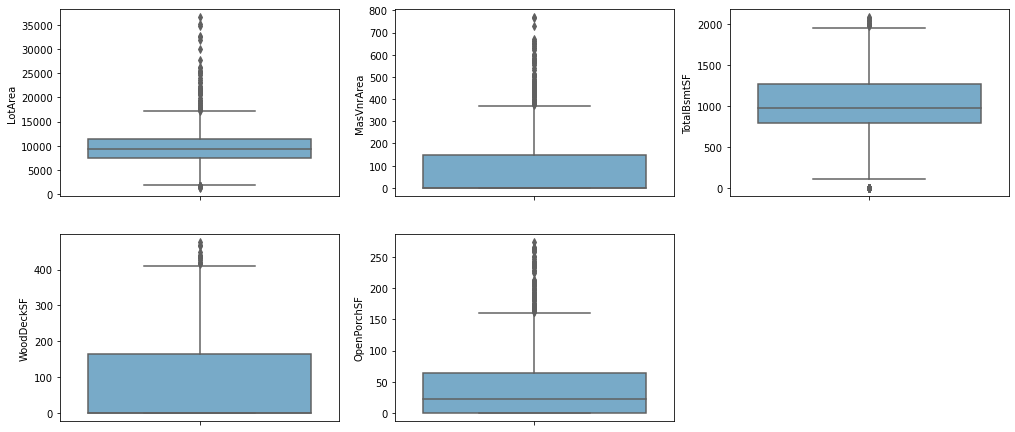

In [27]:
# Visualizing the capped columns
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Blues', data = house_numeric)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Blues', data = house_numeric)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Blues', data = house_numeric)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Blues', data = house_numeric)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Blues', data = house_numeric)
plt.show()

#### Data preparation

In [28]:
# Dropping the months column as we already know the age of the houses
house_numeric.drop(['MoSold'],1, inplace = True)

In [29]:
# Dealing with year sold, year built and age columns
house_numeric['GarageYrBlt'] = house_numeric['GarageYrBlt'].astype(int)

# Creating new variables
house_numeric['Age'] = house_numeric['YrSold'] - house_numeric['YearBuilt']
house_numeric['Remod_Age'] = house_numeric['YrSold'] - house_numeric['YearRemodAdd']
house_numeric['Garage_Age'] = house_numeric['YrSold'] - house_numeric['GarageYrBlt']

# Dropping the original columns
house_numeric.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],1, inplace = True)

In [30]:
house_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age,Remod_Age,Garage_Age
0,60,65.000,8450,7,5,196.000,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,0,2,0,61,0,0,0,0,0,208500,5,5,5
1,20,80.000,9600,6,8,0.000,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,1,2,298,0,0,0,0,0,0,181500,31,31,31
2,60,68.000,11250,7,5,162.000,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,1,2,0,42,0,0,0,0,0,223500,7,6,7
3,70,60.000,9550,7,5,0.000,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,1,3,0,35,272,0,0,0,0,140000,91,36,8
4,60,84.000,14260,8,5,350.000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,1,3,192,84,0,0,0,0,0,250000,8,8,8


In [31]:
house_categorical.head(10)

,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,RL,Reg,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,No Fireplace,Attchd,RFn
1,RL,Reg,FR2,Veenker,1Story,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,TA,TA,Attchd,RFn
2,RL,IR1,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,RFn
3,RL,IR1,Corner,Crawfor,2Story,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Gd,Gd,Detchd,Unf
4,RL,IR1,FR2,NoRidge,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Gd,TA,Attchd,RFn
5,RL,IR1,Inside,Mitchel,1.5Fin,Gable,VinylSd,VinylSd,None,TA,Wood,Gd,No,GLQ,Ex,TA,No Fireplace,Attchd,Unf
6,RL,Reg,Inside,Somerst,1Story,Gable,VinylSd,VinylSd,Stone,Gd,PConc,Ex,Av,GLQ,Ex,Gd,Gd,Attchd,RFn
7,RL,IR1,Corner,NWAmes,2Story,Gable,HdBoard,HdBoard,Stone,TA,CBlock,Gd,Mn,ALQ,Ex,TA,TA,Attchd,RFn
8,RM,Reg,Inside,OldTown,1.5Fin,Gable,BrkFace,Wd Shng,None,TA,BrkTil,TA,No,Unf,Gd,TA,TA,Detchd,Unf
9,RL,Reg,Corner,BrkSide,1.5Unf,Gable,MetalSd,MetalSd,None,TA,BrkTil,TA,No,GLQ,Ex,TA,TA,Attchd,RFn


In [32]:
# Converting the categorical values to ordinal values
house_categorical['LotShape'] = house_categorical['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
house_categorical['ExterQual'] = house_categorical['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
house_categorical['BsmtQual'] = house_categorical['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Basement': 0})
house_categorical['BsmtExposure'] = house_categorical['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'No Basement': 0})
house_categorical['BsmtFinType1'] = house_categorical['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'No Basement': 0})
house_categorical['FireplaceQu'] = house_categorical['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Fireplace': 0})
house_categorical['GarageFinish'] = house_categorical['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'No Garage': 0 })
house_categorical['HeatingQC'] = house_categorical['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_categorical['KitchenQual'] = house_categorical['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})

In [33]:
house_categorical.head(10)

,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish
0,RL,3,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,4,PConc,4,1,6,5,4,0,Attchd,2
1,RL,3,FR2,Veenker,1Story,Gable,MetalSd,MetalSd,None,3,CBlock,4,4,5,5,3,3,Attchd,2
2,RL,2,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,4,PConc,4,2,6,5,4,3,Attchd,2
3,RL,2,Corner,Crawfor,2Story,Gable,Wd Sdng,Wd Shng,None,3,BrkTil,3,1,5,4,4,4,Detchd,1
4,RL,2,FR2,NoRidge,2Story,Gable,VinylSd,VinylSd,BrkFace,4,PConc,4,3,6,5,4,3,Attchd,2
5,RL,2,Inside,Mitchel,1.5Fin,Gable,VinylSd,VinylSd,None,3,Wood,4,1,6,5,3,0,Attchd,1
6,RL,3,Inside,Somerst,1Story,Gable,VinylSd,VinylSd,Stone,4,PConc,5,3,6,5,4,4,Attchd,2
7,RL,2,Corner,NWAmes,2Story,Gable,HdBoard,HdBoard,Stone,3,CBlock,4,2,5,5,3,3,Attchd,2
8,RM,3,Inside,OldTown,1.5Fin,Gable,BrkFace,Wd Shng,None,3,BrkTil,3,1,1,4,3,3,Detchd,1
9,RL,3,Corner,BrkSide,1.5Unf,Gable,MetalSd,MetalSd,None,3,BrkTil,3,1,6,5,3,3,Attchd,2


In [34]:
house_categorical.dtypes

MSZoning        object
LotShape         int64
LotConfig       object
Neighborhood    object
HouseStyle      object
RoofStyle       object
Exterior1st     object
Exterior2nd     object
MasVnrType      object
ExterQual        int64
Foundation      object
BsmtQual         int64
BsmtExposure     int64
BsmtFinType1     int64
HeatingQC        int64
KitchenQual      int64
FireplaceQu      int64
GarageType      object
GarageFinish     int64
dtype: object

In [35]:
# Creating dummies for remaining categorical columns that are objects
house_categorical_objects = house_categorical.select_dtypes(include=['object'])
house_categorical_objects.head()

,MSZoning,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType
0,RL,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd
1,RL,FR2,Veenker,1Story,Gable,MetalSd,MetalSd,None,CBlock,Attchd
2,RL,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd
3,RL,Corner,Crawfor,2Story,Gable,Wd Sdng,Wd Shng,None,BrkTil,Detchd
4,RL,FR2,NoRidge,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd


In [36]:
# Dummies
house_dummies = pd.get_dummies(house_categorical_objects, drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage
0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [37]:
# dropping the originals
house_categorical = house_categorical.drop(list(house_categorical_objects), axis=1)

In [38]:
house_categorical.head()

,LotShape,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageFinish
0,3,4,4,1,6,5,4,0,2
1,3,3,4,4,5,5,3,3,2
2,2,4,4,2,6,5,4,3,2
3,2,3,3,1,5,4,4,4,1
4,2,4,4,3,6,5,4,3,2


In [39]:
house_categorical = pd.concat([house_categorical, house_dummies], axis=1)
house_categorical.head()

,LotShape,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage
0,3,4,4,1,6,5,4,0,2,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,3,3,4,4,5,5,3,3,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,2,4,4,2,6,5,4,3,2,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,2,3,3,1,5,4,4,4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,2,4,4,3,6,5,4,3,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [40]:
house_categorical.shape

(1460, 96)

In [41]:
# Combining the prepared numeric and categorical data into single data frame
house_prepared_data = pd.concat([house_numeric, house_categorical], axis=1)
house_prepared_data = house_prepared_data.dropna()

In [42]:
house_prepared_data.shape

(1386, 129)

#### Model building

In [43]:
# Test-train split
X = house_prepared_data.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Age,Remod_Age,Garage_Age,LotShape,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageFinish,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage
0,60.000,65.000,8450.000,7.000,5.000,196.000,706.000,0.000,150.000,856.000,856.000,854.000,0.000,1710.000,1.000,0.000,2.000,1.000,3.000,1.000,0.000,2.000,0.000,61.000,0.000,0.000,0.000,0.000,0.000,5.000,5.000,5.000,3,4,4,1,6,5,4,0,2,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20.000,80.000,9600.000,6.000,8.000,0.000,978.000,0.000,284.000,1262.000,1262.000,0.000,0.000,1262.000,0.000,1.000,2.000,0.000,3.000,1.000,1.000,2.000,298.000,0.000,0.000,0.000,0.000,0.000,0.000,31.000,31.000,31.000,3,3,4,4,5,5,3,3,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,60.000,68.000,11250.000,7.000,5.000,162.000,486.000,0.000,434.000,920.000,920.000,866.000,0.000,1786.000,1.000,0.000,2.000,1.000,3.000,1.000,1.000,2.000,0.000,42.000,0.000,0.000,0.000,0.000,0.000,7.000,6.000,7.000,2,4,4,2,6,5,4,3,2,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70.000,60.000,9550.000,7.000,5.000,0.000,216.000,0.000,540.000,756.000,961.000,756.000,0.000,1717.000,1.000,0.000,1.000,0.000,3.000,1.000,1.000,3.000,0.000,35.000,272.000,0.000,0.000,0.000,0.000,91.000,36.000,8.000,2,3,3,1,5,4,4,4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,60.000,84.000,14260.000,8.000,5.000,350.000,655.000,0.000,490.000,1145.000,1145.000,1053.000,0.000,2198.000,1.000,0.000,2.000,1.000,4.000,1.000,1.000,3.000,192.000,84.000,0.000,0.000,0.000,0.000,0.000,8.000,8.000,8.000,2,4,4,3,6,5,4,3,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [44]:
y = np.log(house_prepared_data['SalePrice'])
y.head()

0   12.248
1   12.109
2   12.317
3   11.849
4   12.429
Name: SalePrice, dtype: float64

In [45]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3, random_state=100)

In [46]:
# Scaling features

numericals = X_train.select_dtypes(include=['int64','float64']).columns
numericals

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Age', 'Remod_Age', 'Garage_Age', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish'], dtype='object')

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[numericals] = scaler.fit_transform(X_train[numericals])
X_test[numericals] = scaler.transform(X_test[numericals])

#### Recursive Feature Elimination

In [48]:
# RFE with 50 features

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [49]:
cols_rfe = X_train.columns[rfe.support_]

rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
# assigning the 50 features selected by RFE to a dataframe
rfe_df = rfe_df.loc[rfe_df['rfe_support'] == True]
rfe_df.reset_index(drop=True, inplace=True)
rfe_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,TotalBsmtSF,True,1
5,GrLivArea,True,1
6,GarageCars,True,1
7,Age,True,1
8,Remod_Age,True,1
9,MSZoning_FV,True,1


In [50]:
X_train_rfe = X_train[cols_rfe]

X_train = X_train_rfe[X_train_rfe.columns]
X_test = X_test[X_train.columns]

#### Ridge regression

In [51]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [52]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002,0.001,0.001,0.000,0.000,{'alpha': 0.0001},-0.087,-0.083,-0.085,-0.078,-0.081,-0.083,0.003,24,-0.075,-0.076,-0.075,-0.077,-0.076,-0.076,0.001
1,0.002,0.000,0.001,0.000,0.001,{'alpha': 0.001},-0.087,-0.083,-0.085,-0.078,-0.081,-0.083,0.003,23,-0.075,-0.076,-0.075,-0.077,-0.076,-0.076,0.001
2,0.003,0.001,0.001,0.000,0.010,{'alpha': 0.01},-0.087,-0.083,-0.085,-0.078,-0.081,-0.083,0.003,22,-0.075,-0.076,-0.075,-0.077,-0.076,-0.076,0.001
3,0.002,0.000,0.001,0.000,0.050,{'alpha': 0.05},-0.087,-0.083,-0.084,-0.078,-0.081,-0.083,0.003,21,-0.075,-0.076,-0.075,-0.077,-0.076,-0.076,0.001
4,0.002,0.000,0.001,0.000,0.100,{'alpha': 0.1},-0.087,-0.083,-0.084,-0.078,-0.081,-0.083,0.003,20,-0.075,-0.077,-0.075,-0.077,-0.076,-0.076,0.001


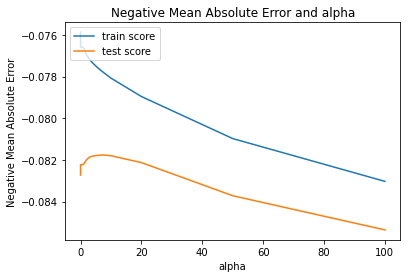

In [53]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [54]:
model_cv.best_estimator_

Ridge(alpha=7.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [55]:
alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02978576,  0.08777287,  0.05826577,  0.04105277,  0.05456401,
        0.12372223,  0.0345188 , -0.07373997, -0.02319199,  0.08148358,
        0.04534675,  0.07653536, -0.01135209,  0.07132964,  0.09194605,
       -0.02595261, -0.03936281, -0.04724952,  0.07840642, -0.02513088,
       -0.02679522,  0.07481146,  0.01479186,  0.0346912 , -0.0479706 ,
        0.0690302 , -0.0061343 , -0.00286851,  0.02195328, -0.02578832,
        0.00580358, -0.02935577,  0.0337923 , -0.0061343 ,  0.02093362,
        0.03134633,  0.03211642, -0.02049283,  0.02233198,  0.02012256,
        0.03524782,  0.05883331,  0.01653073, -0.03219293,  0.04034936,
       -0.01386956,  0.04478727, -0.02454162,  0.02494288, -0.00558727])

In [56]:
# Checking the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, ridge.predict(X_test))

0.017392507371405432

In [57]:
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9179806911206181


In [58]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8801945436324696


In [59]:
# Getting the features and coefficienst into a dataframe
ridge_df = pd.DataFrame({'Feature':X_train.columns, 'Coefficient':ridge.coef_.round(3)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Feature,Coefficient
0,LotArea,0.030
1,OverallQual,0.088
2,OverallCond,0.058
3,BsmtFinSF1,0.041
4,TotalBsmtSF,0.055
5,GrLivArea,0.124
6,GarageCars,0.035
7,Age,-0.074
8,Remod_Age,-0.023
9,MSZoning_FV,0.081


In [60]:
ridge_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_dict

{'LotArea': 0.0298,
 'OverallQual': 0.0878,
 'OverallCond': 0.0583,
 'BsmtFinSF1': 0.0411,
 'TotalBsmtSF': 0.0546,
 'GrLivArea': 0.1237,
 'GarageCars': 0.0345,
 'Age': -0.0737,
 'Remod_Age': -0.0232,
 'MSZoning_FV': 0.0815,
 'MSZoning_RH': 0.0453,
 'MSZoning_RL': 0.0765,
 'MSZoning_RM': -0.0114,
 'Neighborhood_BrkSide': 0.0713,
 'Neighborhood_Crawfor': 0.0919,
 'Neighborhood_Edwards': -0.026,
 'Neighborhood_MeadowV': -0.0394,
 'Neighborhood_Mitchel': -0.0472,
 'Neighborhood_NridgHt': 0.0784,
 'Neighborhood_Sawyer': -0.0251,
 'Neighborhood_SawyerW': -0.0268,
 'Neighborhood_StoneBr': 0.0748,
 'Neighborhood_Veenker': 0.0148,
 'HouseStyle_SLvl': 0.0347,
 'Exterior1st_BrkComm': -0.048,
 'Exterior1st_BrkFace': 0.069,
 'Exterior1st_CBlock': -0.0061,
 'Exterior1st_CemntBd': -0.0029,
 'Exterior1st_MetalSd': 0.022,
 'Exterior1st_Wd Sdng': -0.0258,
 'Exterior2nd_AsphShn': 0.0058,
 'Exterior2nd_Brk Cmn': -0.0294,
 'Exterior2nd_BrkFace': 0.0338,
 'Exterior2nd_CBlock': -0.0061,
 'Exterior2nd_CmentBd

In [61]:
# Minimising the features to 15 using RFE
X_train_ridge = X_train[ridge_df.Feature]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train_ridge, y_train)

In [62]:
def coeff_func(x):
    return ridge_dict[x]

rfe_df2 = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
rfe_df2 = rfe_df2.loc[rfe_df2['rfe_support'] == True]
rfe_df2.reset_index(drop=True, inplace=True)

rfe_df2['Coefficient'] = rfe_df2['Features'].apply(coeff_func)
rfe_df2 = rfe_df2.sort_values(by=['Coefficient'], ascending=False)
rfe_df2 = rfe_df2.head(10)
rfe_df2

,Features,rfe_support,rfe_ranking,Coefficient
1,GrLivArea,True,1,0.124
6,Neighborhood_Crawfor,True,1,0.092
0,OverallQual,True,1,0.088
2,MSZoning_FV,True,1,0.082
7,Neighborhood_NridgHt,True,1,0.078
4,MSZoning_RL,True,1,0.076
3,MSZoning_RH,True,1,0.045
11,GarageType_BuiltIn,True,1,0.045
9,GarageType_Attchd,True,1,0.040
13,GarageType_Detchd,True,1,0.025


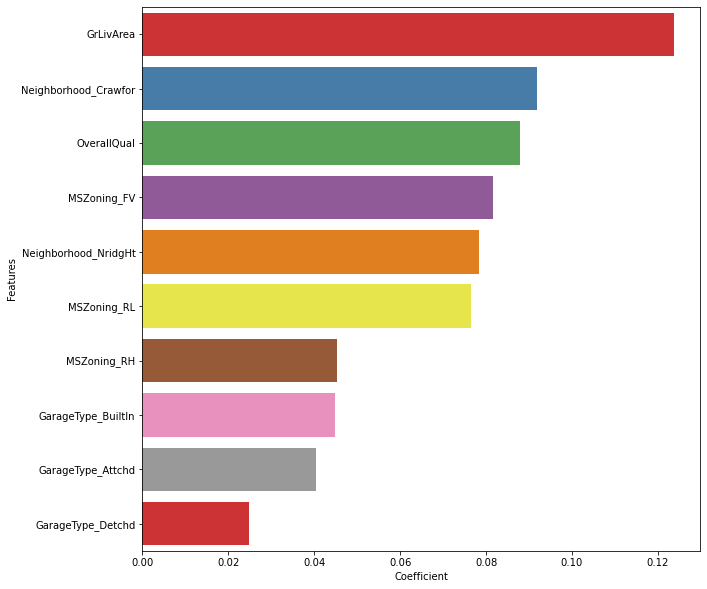

In [63]:
# bar plot
plt.figure(figsize=(10,10))
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = rfe_df2)
plt.show()

The above plot tells us the features that affect the price of the house

#### Lasso

In [82]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [83]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007,0.001,0.001,0.000,0.000,{'alpha': 0.0001},-0.085,-0.083,-0.083,-0.079,-0.082,-0.083,0.002,1,-0.076,-0.077,-0.076,-0.078,-0.076,-0.077,0.001
1,0.004,0.000,0.001,0.000,0.001,{'alpha': 0.001},-0.085,-0.082,-0.083,-0.081,-0.084,-0.083,0.001,2,-0.079,-0.080,-0.079,-0.081,-0.080,-0.079,0.001
2,0.002,0.000,0.001,0.000,0.010,{'alpha': 0.01},-0.089,-0.094,-0.091,-0.087,-0.091,-0.090,0.002,3,-0.088,-0.089,-0.088,-0.090,-0.088,-0.089,0.001
3,0.004,0.002,0.001,0.000,0.050,{'alpha': 0.05},-0.113,-0.124,-0.113,-0.110,-0.113,-0.114,0.005,4,-0.112,-0.113,-0.112,-0.114,-0.112,-0.112,0.001
4,0.003,0.000,0.001,0.000,0.100,{'alpha': 0.1},-0.150,-0.162,-0.150,-0.143,-0.154,-0.152,0.006,5,-0.150,-0.150,-0.151,-0.152,-0.150,-0.151,0.001


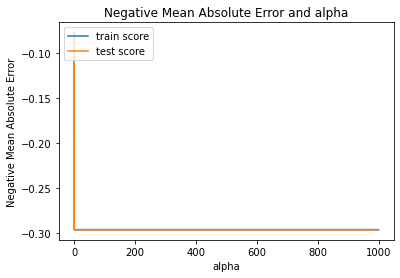

In [84]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [85]:
model_cv.best_estimator_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [87]:
lasso.coef_

array([ 0.03118067,  0.08213511,  0.05623255,  0.04087028,  0.05416049,
        0.12448013,  0.03494097, -0.07363414, -0.02297254,  0.23317082,
        0.19941791,  0.20873955,  0.12138607,  0.08462585,  0.11260196,
       -0.02510846, -0.05790583, -0.05313631,  0.09648236, -0.02771875,
       -0.02815431,  0.11084206,  0.01546448,  0.0402452 , -0.20871313,
        0.07551729, -0.        , -0.        ,  0.02322032, -0.03342767,
        0.        , -0.        ,  0.03849006, -0.        ,  0.01968805,
        0.03514893,  0.03931534, -0.02546763,  0.04392058,  0.04073176,
        0.05700712,  0.05819765,  0.06338   , -0.0673844 ,  0.06789876,
        0.0045466 ,  0.07498974, -0.        ,  0.05127803,  0.01791452])

In [88]:
# Check the mean squared error
mean_squared_error(y_test, lasso.predict(X_test))

0.016987307241949464

In [89]:
# Getting the Features and coefficients into a dataframe
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(3)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.031
1,OverallQual,0.082
2,OverallCond,0.056
3,BsmtFinSF1,0.041
4,TotalBsmtSF,0.054
5,GrLivArea,0.124
6,GarageCars,0.035
7,Age,-0.074
8,Remod_Age,-0.023
9,MSZoning_FV,0.233


In [90]:
lasso_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_dict

{'LotArea': 0.031180669837308394,
 'OverallQual': 0.0821351116260417,
 'OverallCond': 0.05623255196467618,
 'BsmtFinSF1': 0.040870279059869244,
 'TotalBsmtSF': 0.054160491289908574,
 'GrLivArea': 0.12448013346267552,
 'GarageCars': 0.03494097493934329,
 'Age': -0.0736341441331577,
 'Remod_Age': -0.022972544895630848,
 'MSZoning_FV': 0.23317082454538327,
 'MSZoning_RH': 0.1994179122279559,
 'MSZoning_RL': 0.20873955200176753,
 'MSZoning_RM': 0.12138607172075988,
 'Neighborhood_BrkSide': 0.08462585089546314,
 'Neighborhood_Crawfor': 0.11260196197298773,
 'Neighborhood_Edwards': -0.025108464467812338,
 'Neighborhood_MeadowV': -0.05790582900692189,
 'Neighborhood_Mitchel': -0.05313630992856303,
 'Neighborhood_NridgHt': 0.0964823649506658,
 'Neighborhood_Sawyer': -0.0277187483255858,
 'Neighborhood_SawyerW': -0.028154306753865467,
 'Neighborhood_StoneBr': 0.11084205822181084,
 'Neighborhood_Veenker': 0.01546448368839077,
 'HouseStyle_SLvl': 0.04024519930546768,
 'Exterior1st_BrkComm': -0.20

In [91]:
# RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [92]:
def coeff_func(x):
    return lasso_dict[x]

rfe_df3 = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
rfe_df3 = rfe_df3.loc[rfe_df3['rfe_support'] == True]
rfe_df3.reset_index(drop=True, inplace=True)

rfe_df3['Coefficient'] = rfe_df3['Features'].apply(coeff_func)
rfe_df3 = rfe_df3.sort_values(by=['Coefficient'], ascending=False)
rfe_df3 = rfe_df3.head(10)
rfe_df3

,Features,rfe_support,rfe_ranking,Coefficient
2,MSZoning_FV,True,1,0.233
4,MSZoning_RL,True,1,0.209
3,MSZoning_RH,True,1,0.199
1,GrLivArea,True,1,0.124
5,MSZoning_RM,True,1,0.121
6,Neighborhood_Crawfor,True,1,0.113
8,Neighborhood_StoneBr,True,1,0.111
7,Neighborhood_NridgHt,True,1,0.096
0,OverallQual,True,1,0.082
10,Exterior1st_BrkFace,True,1,0.076


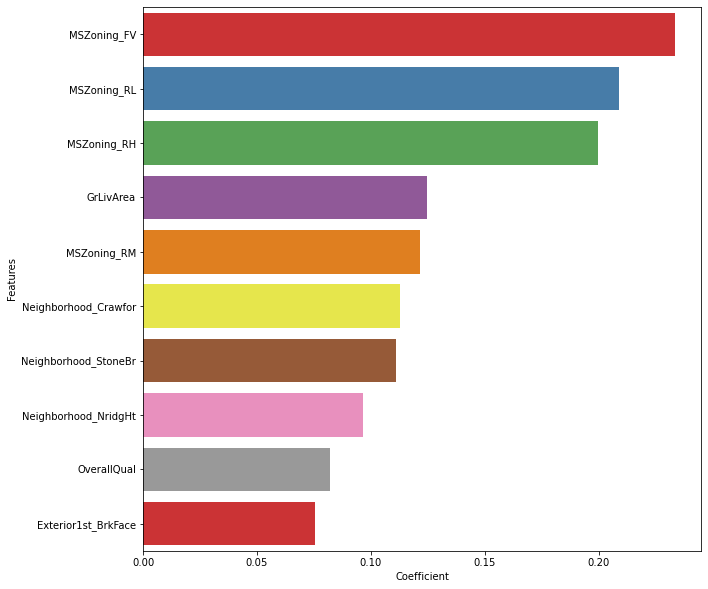

In [93]:
# bar plot
plt.figure(figsize=(10,10))
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = rfe_df3)
plt.show()

Optimal lambda values -
 1. Ridge - 7
 2. Lasso - 0.0001

The Mean squared errors are almost similar for both the methods - 
 1. Ridge - 0.017392
 2. Lasso - 0.016987

Conclusions - 
 - GrLiv Area (Ground living area) is the top feature as per Ridge model
 - MSZoning (General zoning classification) is the top feature as per Lasso with GrLivArea being the second one
 - Both the methods offer a overlapping of few features which can be recommended to the company

# Subjective Questions Code

In [94]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [95]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003,0.001,0.001,0.000,0.000,{'alpha': 0.0001},-0.087,-0.083,-0.085,-0.078,-0.081,-0.083,0.003,24,-0.075,-0.076,-0.075,-0.077,-0.076,-0.076,0.001
1,0.002,0.000,0.001,0.000,0.001,{'alpha': 0.001},-0.087,-0.083,-0.085,-0.078,-0.081,-0.083,0.003,23,-0.075,-0.076,-0.075,-0.077,-0.076,-0.076,0.001
2,0.003,0.000,0.001,0.000,0.010,{'alpha': 0.01},-0.087,-0.083,-0.085,-0.078,-0.081,-0.083,0.003,22,-0.075,-0.076,-0.075,-0.077,-0.076,-0.076,0.001
3,0.002,0.000,0.001,0.000,0.050,{'alpha': 0.05},-0.087,-0.083,-0.084,-0.078,-0.081,-0.083,0.003,21,-0.075,-0.076,-0.075,-0.077,-0.076,-0.076,0.001
4,0.003,0.000,0.001,0.000,0.100,{'alpha': 0.1},-0.087,-0.083,-0.084,-0.078,-0.081,-0.083,0.003,20,-0.075,-0.077,-0.075,-0.077,-0.076,-0.076,0.001


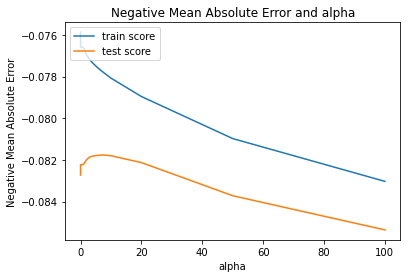

In [96]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [97]:
model_cv.best_estimator_

Ridge(alpha=7.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [98]:
alpha = 14
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02932848,  0.09115026,  0.05797124,  0.04095401,  0.05502105,
        0.12230606,  0.03555686, -0.07125827, -0.02378122,  0.05533367,
        0.0237226 ,  0.05785163, -0.029325  ,  0.05939144,  0.07631624,
       -0.0247361 , -0.02734204, -0.04083481,  0.06582338, -0.02268372,
       -0.02361716,  0.05488324,  0.01182759,  0.02870591, -0.02811291,
        0.06143793, -0.00338961,  0.00203487,  0.02044861, -0.02032918,
        0.00305444, -0.02048712,  0.02799446, -0.00338961,  0.01401249,
        0.02382532,  0.02510779, -0.01687925,  0.01292297,  0.01084863,
        0.02566689,  0.05762182,  0.00908051, -0.01989839,  0.03097983,
       -0.01375857,  0.03486455, -0.02221901,  0.01595862, -0.01156708])

In [99]:
# Checking the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, ridge.predict(X_test))

0.01743447333242471

In [100]:
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9160903407833304


In [101]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8799054679400204


In [102]:
# Getting the features and coefficienst into a dataframe
ridge_df = pd.DataFrame({'Feature':X_train.columns, 'Coefficient':ridge.coef_.round(3)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Feature,Coefficient
0,LotArea,0.029
1,OverallQual,0.091
2,OverallCond,0.058
3,BsmtFinSF1,0.041
4,TotalBsmtSF,0.055
5,GrLivArea,0.122
6,GarageCars,0.036
7,Age,-0.071
8,Remod_Age,-0.024
9,MSZoning_FV,0.055


In [103]:
ridge_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_dict

{'LotArea': 0.0293,
 'OverallQual': 0.0912,
 'OverallCond': 0.058,
 'BsmtFinSF1': 0.041,
 'TotalBsmtSF': 0.055,
 'GrLivArea': 0.1223,
 'GarageCars': 0.0356,
 'Age': -0.0713,
 'Remod_Age': -0.0238,
 'MSZoning_FV': 0.0553,
 'MSZoning_RH': 0.0237,
 'MSZoning_RL': 0.0579,
 'MSZoning_RM': -0.0293,
 'Neighborhood_BrkSide': 0.0594,
 'Neighborhood_Crawfor': 0.0763,
 'Neighborhood_Edwards': -0.0247,
 'Neighborhood_MeadowV': -0.0273,
 'Neighborhood_Mitchel': -0.0408,
 'Neighborhood_NridgHt': 0.0658,
 'Neighborhood_Sawyer': -0.0227,
 'Neighborhood_SawyerW': -0.0236,
 'Neighborhood_StoneBr': 0.0549,
 'Neighborhood_Veenker': 0.0118,
 'HouseStyle_SLvl': 0.0287,
 'Exterior1st_BrkComm': -0.0281,
 'Exterior1st_BrkFace': 0.0614,
 'Exterior1st_CBlock': -0.0034,
 'Exterior1st_CemntBd': 0.002,
 'Exterior1st_MetalSd': 0.0204,
 'Exterior1st_Wd Sdng': -0.0203,
 'Exterior2nd_AsphShn': 0.0031,
 'Exterior2nd_Brk Cmn': -0.0205,
 'Exterior2nd_BrkFace': 0.028,
 'Exterior2nd_CBlock': -0.0034,
 'Exterior2nd_CmentBd':

In [104]:
# Minimising the features to 15 using RFE
X_train_ridge = X_train[ridge_df.Feature]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train_ridge, y_train)

In [105]:
def coeff_func(x):
    return ridge_dict[x]

rfe_df2 = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
rfe_df2 = rfe_df2.loc[rfe_df2['rfe_support'] == True]
rfe_df2.reset_index(drop=True, inplace=True)

rfe_df2['Coefficient'] = rfe_df2['Features'].apply(coeff_func)
rfe_df2 = rfe_df2.sort_values(by=['Coefficient'], ascending=False)
rfe_df2 = rfe_df2.head(10)
rfe_df2

,Features,rfe_support,rfe_ranking,Coefficient
1,GrLivArea,True,1,0.122
0,OverallQual,True,1,0.091
6,Neighborhood_Crawfor,True,1,0.076
7,Neighborhood_NridgHt,True,1,0.066
4,MSZoning_RL,True,1,0.058
2,MSZoning_FV,True,1,0.055
11,GarageType_BuiltIn,True,1,0.035
9,GarageType_Attchd,True,1,0.031
3,MSZoning_RH,True,1,0.024
13,GarageType_Detchd,True,1,0.016


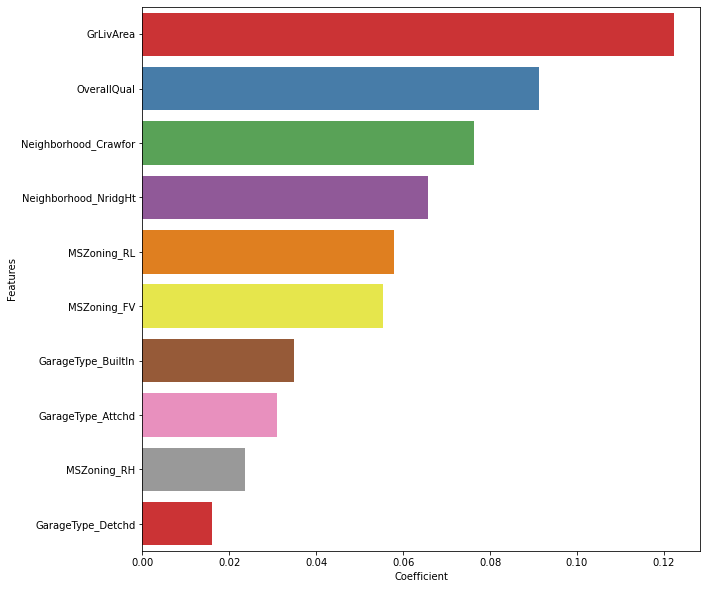

In [106]:
# bar plot
plt.figure(figsize=(10,10))
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = rfe_df2)
plt.show()

The above plot tells us the features that affect the price of the house

#### Lasso

In [107]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [108]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007,0.001,0.001,0.000,0.000,{'alpha': 0.0001},-0.085,-0.083,-0.083,-0.079,-0.082,-0.083,0.002,1,-0.076,-0.077,-0.076,-0.078,-0.076,-0.077,0.001
1,0.004,0.000,0.001,0.000,0.001,{'alpha': 0.001},-0.085,-0.082,-0.083,-0.081,-0.084,-0.083,0.001,2,-0.079,-0.080,-0.079,-0.081,-0.080,-0.079,0.001
2,0.003,0.000,0.001,0.000,0.010,{'alpha': 0.01},-0.089,-0.094,-0.091,-0.087,-0.091,-0.090,0.002,3,-0.088,-0.089,-0.088,-0.090,-0.088,-0.089,0.001
3,0.003,0.000,0.001,0.000,0.050,{'alpha': 0.05},-0.113,-0.124,-0.113,-0.110,-0.113,-0.114,0.005,4,-0.112,-0.113,-0.112,-0.114,-0.112,-0.112,0.001
4,0.017,0.028,0.001,0.000,0.100,{'alpha': 0.1},-0.150,-0.162,-0.150,-0.143,-0.154,-0.152,0.006,5,-0.150,-0.150,-0.151,-0.152,-0.150,-0.151,0.001


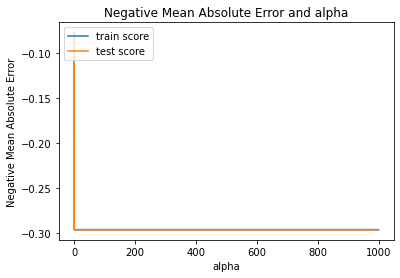

In [109]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [110]:
model_cv.best_estimator_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [111]:
alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [112]:
lasso.coef_

array([ 0.0303428 ,  0.08436626,  0.05772585,  0.04071671,  0.05452744,
        0.1246717 ,  0.03375992, -0.07380191, -0.02272611,  0.17097597,
        0.13050947,  0.1499228 ,  0.06139119,  0.08228618,  0.1084044 ,
       -0.02292489, -0.04259321, -0.04954639,  0.09303914, -0.0256528 ,
       -0.02519443,  0.10335627,  0.00591693,  0.03705465, -0.15590965,
        0.08022569, -0.        ,  0.        ,  0.02138339, -0.02561507,
        0.        , -0.        ,  0.028538  , -0.        ,  0.01506848,
        0.02848388,  0.03038175, -0.02121422,  0.02184497,  0.01891453,
        0.03420842,  0.05908127,  0.01154617, -0.03861924,  0.05328926,
       -0.        ,  0.05868103, -0.0054775 ,  0.03665872,  0.        ])

In [113]:
# Check the mean squared error
mean_squared_error(y_test, lasso.predict(X_test))

0.017099975641277923

In [114]:
# Getting the Features and coefficients into a dataframe
lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(3)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,LotArea,0.030
1,OverallQual,0.084
2,OverallCond,0.058
3,BsmtFinSF1,0.041
4,TotalBsmtSF,0.055
5,GrLivArea,0.125
6,GarageCars,0.034
7,Age,-0.074
8,Remod_Age,-0.023
9,MSZoning_FV,0.171


In [115]:
lasso_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_dict

{'LotArea': 0.03034279817081996,
 'OverallQual': 0.08436625989398566,
 'OverallCond': 0.05772584715058283,
 'BsmtFinSF1': 0.04071671477739394,
 'TotalBsmtSF': 0.05452743868691673,
 'GrLivArea': 0.12467170165521597,
 'GarageCars': 0.03375991839855985,
 'Age': -0.07380190844042535,
 'Remod_Age': -0.022726111697367844,
 'MSZoning_FV': 0.1709759696093129,
 'MSZoning_RH': 0.13050946714646647,
 'MSZoning_RL': 0.1499227978892666,
 'MSZoning_RM': 0.061391185657675935,
 'Neighborhood_BrkSide': 0.08228617755366023,
 'Neighborhood_Crawfor': 0.10840439861779787,
 'Neighborhood_Edwards': -0.022924894531789503,
 'Neighborhood_MeadowV': -0.042593211233879345,
 'Neighborhood_Mitchel': -0.04954639277511379,
 'Neighborhood_NridgHt': 0.09303914079369448,
 'Neighborhood_Sawyer': -0.02565279643223709,
 'Neighborhood_SawyerW': -0.025194433232841318,
 'Neighborhood_StoneBr': 0.1033562728727689,
 'Neighborhood_Veenker': 0.0059169320477223215,
 'HouseStyle_SLvl': 0.03705465399794349,
 'Exterior1st_BrkComm': -0

In [116]:
# RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [117]:
def coeff_func(x):
    return lasso_dict[x]

rfe_df3 = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
rfe_df3 = rfe_df3.loc[rfe_df3['rfe_support'] == True]
rfe_df3.reset_index(drop=True, inplace=True)

rfe_df3['Coefficient'] = rfe_df3['Features'].apply(coeff_func)
rfe_df3 = rfe_df3.sort_values(by=['Coefficient'], ascending=False)
rfe_df3 = rfe_df3.head(10)
rfe_df3

,Features,rfe_support,rfe_ranking,Coefficient
3,MSZoning_FV,True,1,0.171
5,MSZoning_RL,True,1,0.150
4,MSZoning_RH,True,1,0.131
1,GrLivArea,True,1,0.125
7,Neighborhood_Crawfor,True,1,0.108
10,Neighborhood_StoneBr,True,1,0.103
9,Neighborhood_NridgHt,True,1,0.093
0,OverallQual,True,1,0.084
12,Exterior1st_BrkFace,True,1,0.080
6,MSZoning_RM,True,1,0.061


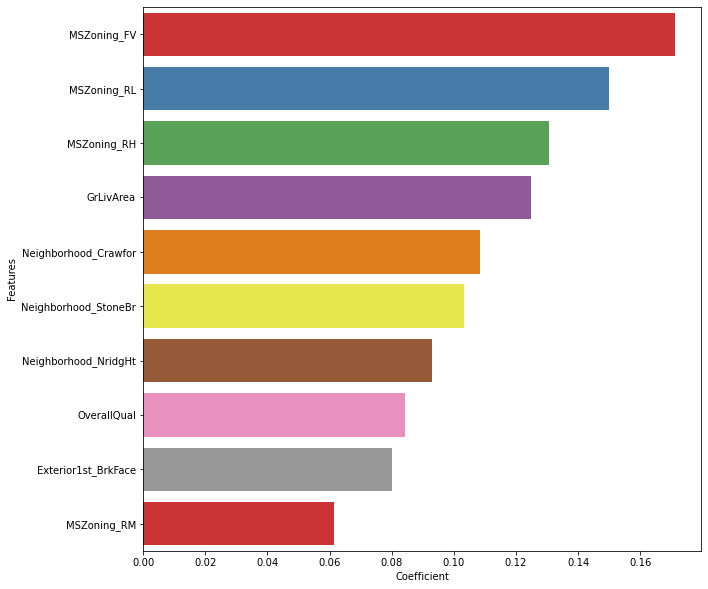

In [118]:
# bar plot
plt.figure(figsize=(10,10))
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = rfe_df3)
plt.show()